In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [2]:
df = pd.read_excel(r"C:\Users\HP\Documents\test_data.xlsx")

In [16]:
df.head()

,Unnamed: 0,location,num_of_unique_IPs_used,login_count,num_of_frequent_operations,c2c_place_order_count,c2c_release_order_count,gift_card_created_amount,gift_card_redeemed_amount,amount,wallet_balance,wallet_free_balance,wallet_locked_balance,deposit_status,transaction_time,prev_transaction_time,account_age_days,status
0,1,Gujranwala,71,23,3,0,2,0,1668.57,1.000000,500000.000000,2.000000,0.000000,Completed,2024-08-26 06:33:20,2024-08-24 16:42:42,4,fraudulent
1,2,Islamabad,2,12,11,2,0,0,0.00,1.000000,1.000000,2.000000,100000.000000,Completed,2024-01-23 11:17:25,2024-01-16 12:45:04,619,normal
2,3,Peshawar,3,4,2,7,3,0,0.00,-8352.464734,-10883.203572,12277.963831,-564.539528,Pending,2024-05-12 22:15:44,2024-05-01 02:59:19,760,normal
3,4,Karachi,13,42,42,28,28,0,0.00,19998.850000,36460.070000,39367.800000,5125.790000,Pending,2024-03-11 04:32:06,2024-03-09 20:29:32,321,anomalous
4,5,Peshawar,4,47,57,30,23,0,0.00,11634.730000,10370.260000,12971.460000,2661.420000,Completed,2024-09-23 09:03:01,2024-09-17 18:23:58,245,anomalous


In [8]:
data = df['category'].value_counts().to_dict()
data

{'anomalous': 3, 'normal': 3, 'fraudulent': 1}

In [ ]:
sorted_data = sorted(data.items(), key = lambda key_value: key_value[1], reverse=True)
sorted_data

[('normal', 15), ('anomalous', 4), ('fraudulent', 1)]

In [3]:
outfit_bold_path = r"C:\Users\HP\Desktop\Python\Data_Science_Projects\fradulent-transaction-detection\frontend\src\assets\Outfit-Bold.ttf"
outfit_thin_path = r"C:\Users\HP\Desktop\Python\Data_Science_Projects\fradulent-transaction-detection\frontend\src\assets\Outfit-VariableFont_wght.ttf"
cabin_path = r"C:\Users\HP\Desktop\Python\Data_Science_Projects\fradulent-transaction-detection\frontend\src\assets\Cabin[wdth,wght].ttf"
open_sans_reg_path = r"C:\Users\HP\Desktop\Python\Data_Science_Projects\fradulent-transaction-detection\frontend\src\assets\OpenSans-Regular.ttf"
outfit_extra_bold_path = r"C:\Users\HP\Desktop\Python\Data_Science_Projects\fradulent-transaction-detection\frontend\src\assets\Outfit-ExtraBold.ttf"

outfit_bold = font_manager.FontProperties(fname=outfit_bold_path)
outfit_thin = font_manager.FontProperties(fname = outfit_thin_path)
cabin = font_manager.FontProperties(fname=cabin_path)
open_sans_reg = font_manager.FontProperties(fname= open_sans_reg_path)
outfit_extra_bold = font_manager.FontProperties(fname= outfit_extra_bold_path)

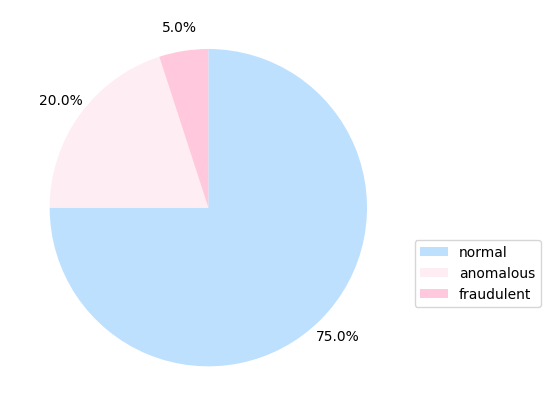

In [44]:
data = df['category'].value_counts().to_dict()

sorted_data = sorted(data.items(), key = lambda key_value: key_value[1], reverse=True)

x = [key_value_tuple[1] for key_value_tuple in sorted_data]
labels = [key_value_tuple[0] for key_value_tuple in sorted_data]
# ["#00ebc1", "#00b8ba", "#0085b4", "#0051ad", "#001ea6"]
colors = ["#bde0fe", "#ffedf4", "#ffc8dd"]
total = sum(x)
percentages = ["{0:.1%}".format(value/total) for value in x]

plt.pie(x, labels=percentages, startangle=90, counterclock= False, colors=colors, textprops={"ha":"center"}, labeldistance=1.15)
plt.legend(labels = labels, loc = (1.02, 0.25))
plt.tight_layout(pad=3)
plt.show()

In [32]:
total = sum(x)
percentages = ["{0:.1%}".format(value/total) for value in x]
percentages

['75.0%', '20.0%', '5.0%']

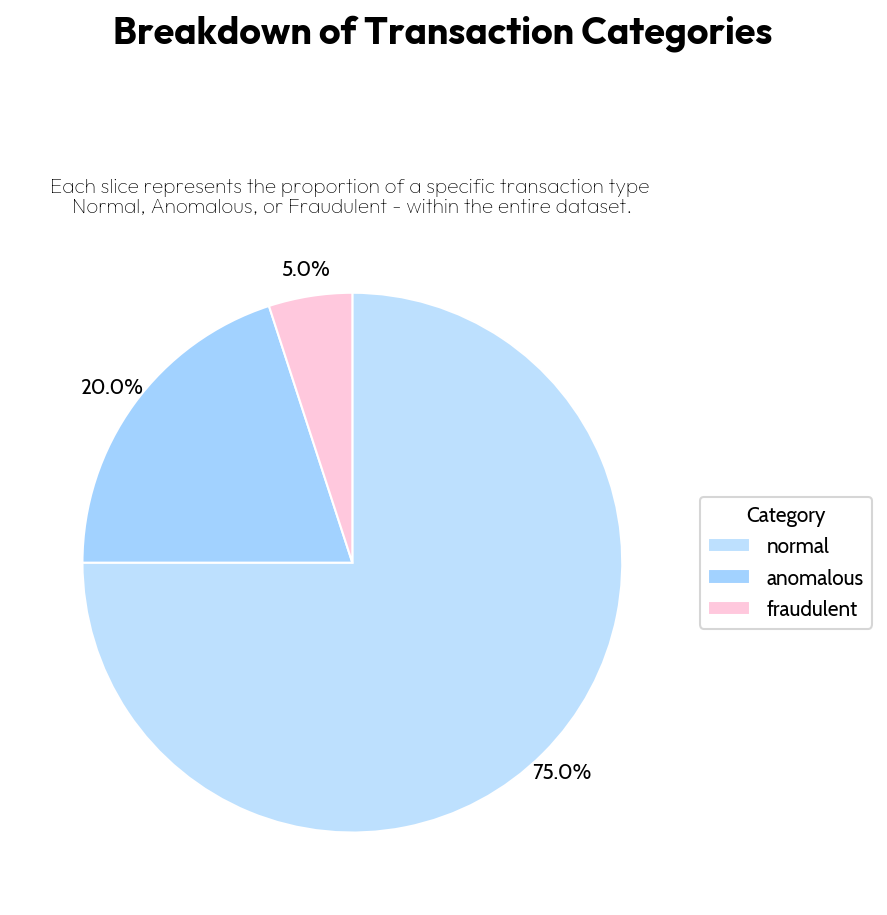

In [68]:
data = df['category'].value_counts().to_dict()
sorted_data = sorted(data.items(), key=lambda kv: kv[1], reverse=True)

x = [val for _, val in sorted_data]
labels = [key for key, _ in sorted_data]
colors = ["#bde0fe", "#a2d2ff", "#ffc8dd"] 

total = sum(x)
percentages = ["{0:.1%}".format(value / total) for value in x]

# Pie Chart Plotting 
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

wedges, texts = ax.pie(
    x,
    labels=percentages,
    startangle=90,
    counterclock=False,
    colors=colors,
    textprops={"ha": "center", "fontsize": 12, "fontproperties": cabin},
    labeldistance=1.1,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

#  Custom Legend 
ax.legend(
    labels=labels,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title="Category",
    title_fontproperties=cabin,
    prop=cabin
)

fig.suptitle(
    "Breakdown of Transaction Categories",
    fontsize=18,
    fontproperties=outfit_bold,
    x=0.5,
    y=1.05,
    
)

ax.set_title(
    "Each slice represents the proportion of a specific transaction type \n"
    "Normal, Anomalous, or Fraudulent - within the entire dataset.",
    fontsize=12,
    loc="center",
    fontproperties=outfit_thin,
    color = "black"
)

plt.tight_layout()
plt.show()

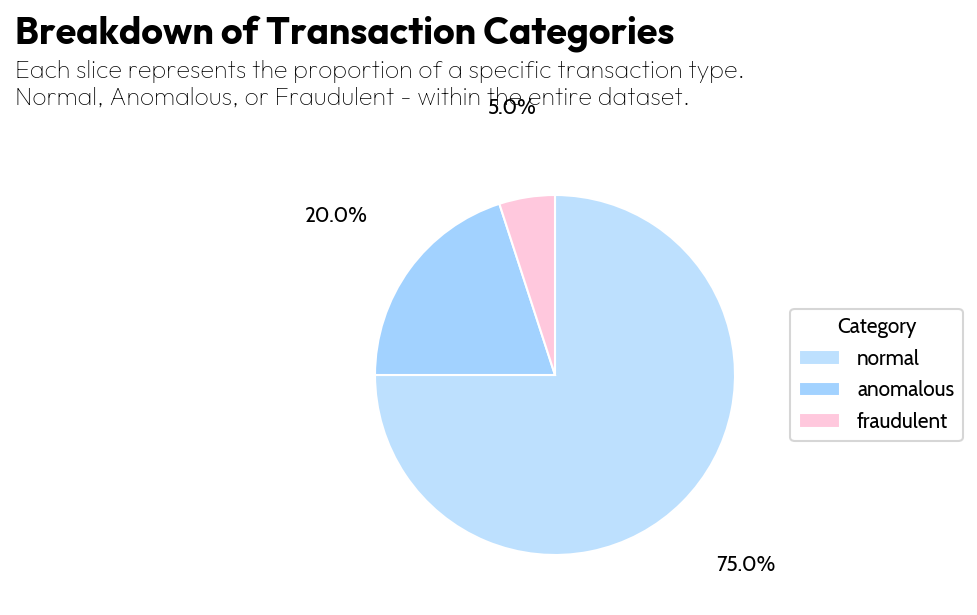

In [85]:

data = df['category'].value_counts().to_dict()
sorted_data = sorted(data.items(), key=lambda kv: kv[1], reverse=True)

x = [val for _, val in sorted_data]
labels = [key for key, _ in sorted_data]
colors = ["#bde0fe", "#a2d2ff", "#ffc8dd"]

total = sum(x)
percentages = ["{0:.1%}".format(value / total) for value in x]

fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
fig.subplots_adjust(top=0.80, bottom=0.1)

# Move pie chart to the right
ax.set_position([0.4, 0.3, 0.5, 0.5])

# Pie chart
wedges, texts = ax.pie(
    x,
    labels=percentages,
    startangle=90,
    counterclock=False,
    colors=colors,
    textprops={"ha": "center", "fontsize": 12, "fontproperties": cabin},
    labeldistance=1.5,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Legend
ax.legend(
    labels=labels,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title="Category",
    title_fontproperties=cabin,
    prop=cabin
)

# Title
fig.suptitle(
    "Breakdown of Transaction Categories",
    fontsize=18,
    fontproperties=outfit_bold,
    x=0.05,
    y=0.95,
    ha="left",
)

# Subtitle — independent of pie chart
fig.text(
    0.05, 0.85,  # x (left), y (height below title)
    "Each slice represents the proportion of a specific transaction type.\n"
    "Normal, Anomalous, or Fraudulent - within the entire dataset.",
    fontsize=12,
    fontproperties=outfit_thin,
    color="black",
    ha="left"
)

plt.show()


In [100]:
def pie_chart(df):
        
    data = df['category'].value_counts().to_dict()
    sorted_data = sorted(data.items(), key=lambda kv: kv[1], reverse=True)

    x = [val for _, val in sorted_data]
    labels = [key for key, _ in sorted_data]
    colors = ["#bde0fe", "#a2d2ff", "#ffc8dd"]

    total = sum(x)
    percentages = ["{0:.1%}".format(value / total) for value in x]

    fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
    fig.subplots_adjust(top=0.80, bottom=0.1)

    # Move pie chart to the right
    ax.set_position([0.4, 0.3, 0.5, 0.5])

    # Pie chart
    wedges, texts = ax.pie(
        x,
        labels=percentages,
        startangle=90,
        counterclock=False,
        colors=colors,
        textprops={"ha": "center", "fontsize": 12, "fontproperties": cabin},
        labeldistance=1.15,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )

    # Legend
    ax.legend(
        labels=labels,
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        title="Category",
        title_fontproperties=cabin,
        prop=cabin
    )

    # Title
    fig.suptitle(
        "Breakdown of Transaction Categories",
        fontsize=18,
        fontproperties=outfit_bold,
        x=0.05,
        y=0.95,
        ha="left",
    )

    # Subtitle — independent of pie chart
    fig.text(
        0.05, 0.85,  # x (left), y (height below title)
        "Each slice represents the proportion of a specific transaction type.\n"
        "Normal, Anomalous, or Fraudulent - within the entire dataset.",
        fontsize=12,
        fontproperties=outfit_thin,
        color="black",
        ha="left"
    )

    plt.show()



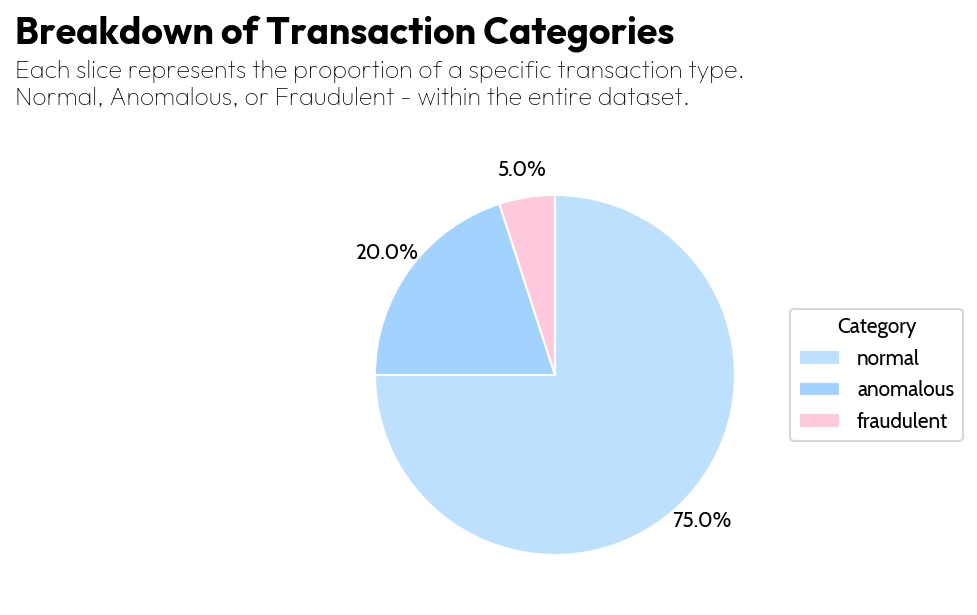

In [101]:
pie_chart(df)

In [37]:
def box_plot(df):
    fig, ax = plt.subplots(figsize=(7, 4))

    ax.boxplot([df[df['category'] == category]['num_of_unique_IPs_used'] for category in df['category'].unique()],
               vert=False)

    # Set the y-axis labels to the categories
    ax.set_yticks(range(1, len(df['category'].unique()) + 1))
    ax.set_yticklabels(df['category'].unique())

   
   # Title
    fig.suptitle(
        "Distribution of Unique IPs Used in All Categories",
        fontsize=28,
        fontproperties=outfit_bold,
        x=0.05,
        y=1.06,
        ha="left",
    )

    # subtitle
    fig.text(
        -0.09, 1.09, 
        "This box plot shows the distribution of the number of unique IPs used by users in different categories of transactions. "
        "\nThe spread of the data is visualized with quartiles, while outliers are marked separately.",
        fontsize=18,
        fontproperties=outfit_thin,
        color="black",
        ha="left",
        va="center",
        transform=plt.gca().transAxes
    )

    ax.set_xlabel("Number of Unique IPs Used", fontsize=18, fontproperties=cabin, color="gray", labelpad=20)
    ax.set_ylabel("Transaction Category", fontsize=18, fontproperties=cabin, color="gray", labelpad=20)

    plt.tight_layout()
    plt.show()

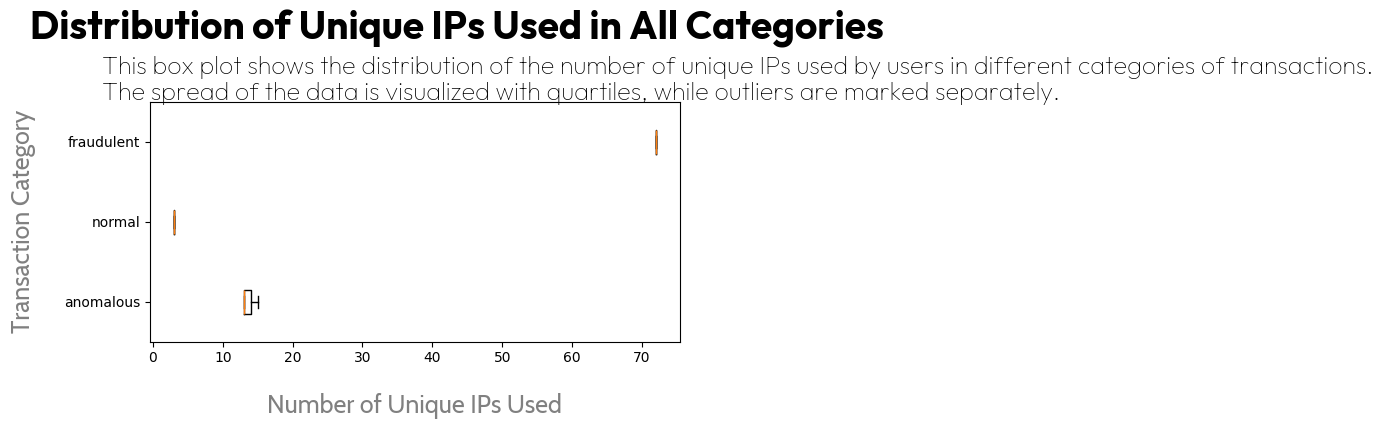

In [38]:
box_plot(df)

In [16]:
def unique_ips_by_category(data):
    fig = px.bar(
        data_frame=data,
        x="status",  
        y="num_of_unique_IPs_used",
        color="status", 
        labels={
            "num_of_unique_IPs_used": "Number of Unique IPs", 
            "status": "Transaction Status"
        },
        color_discrete_sequence=['#bde0fe', '#fb6f92', '#fdffb6'],
        category_orders={"status": ["Normal", "Fraudulent", "Anomalous"]},  
    )

    fig.update_layout(
        title={
            "text": "<b>Number of Unique IPs Used by Transaction Status</b>",
            "x": 0.68,
            "xanchor": "right",
        },
        title_font=dict(
            family=outfit_extra_bold.get_name(),
            size=40,
            color="#3b3b3b"
        ),
        xaxis_title="Transaction Status",
        yaxis_title="Number of Unique IPs",
        bargap=0.2,
        legend_title_text="Transaction Status",
        height=600,  # Increased height
        width = 1450,
        margin=dict(t=120, b=80),  # More space at top and bottom
        annotations=[
            dict(
                text="🔍 This chart shows how many unique IP addresses were used for each transaction status. A higher number of IPs may indicate suspicious activity.",
                x=1.03,
                y=1.1,
                xref="paper",
                yref="paper",
                showarrow=False,
                font=dict(
                    size=18,
                    color="gray",
                    family=open_sans_reg.get_name()
                ),
                align="right"
            )
        ]
    )

    fig.show()


In [17]:
unique_ips_by_category(df)

In [119]:
def wallet_balance_by_category(data):
    fig = px.histogram(
        data,
        x="wallet_balance",
        color="status",  # assuming 'category' refers to 'status'
        nbins=30,
        barmode="overlay",  # like `alpha=0.6` in seaborn
        opacity=0.6,
        color_discrete_sequence=['#fb6f92', '#bde0fe', '#fdffb6']
    )

    fig.update_layout(
        title="💰 Distribution of Wallet Balance by Transaction Status",
        xaxis_title="Wallet Balance (USD)",
        yaxis_title="Count",
        title_x=0.5,
        legend_title_text="Transaction Status",
        bargap=0.1,
    )

    fig.show()

In [120]:
wallet_balance_by_category(df)

In [25]:
def wallet_balance_by_category(data):
  plt.figure(figsize=(10, 5))
  sns.histplot(data=data, x='wallet_balance', hue='category', bins=30, kde=True, palette=  ['#fdffb6', '#bde0fe','#fb6f92'], alpha=0.6)
  plt.xlabel("Distribution of Wallet Balance (USD) by Category")
  plt.ylabel("Wallet Balance (USD)")
  plt.title("Count")
  plt.show()


In [24]:
def wallet_balance_account_age_bubble_chart(data):
    fig = px.scatter(
        data_frame=data,
        x="account_age_days",
        y="wallet_balance",
        size="login_count",  # Bubble size based on login count
        color="status",
        hover_name="location",
        size_max=70,  # Slightly increased max bubble size
        color_discrete_sequence=['#fb6f92', '#bde0fe', '#fdffb6'],
        labels={
            "account_age_days": "Account Age (days)",
            "wallet_balance": "Wallet Balance (USD)",
            "status": "Transaction Status"
        }
    )

    fig.update_layout(
        title={
            "text": "<b>Wallet Balance vs Account Age",
            # <br>(Bubble Size = Login Count)</b>
            "x": 0.42,
            "xanchor": "right",
        },
        title_font=dict(
            family=outfit_extra_bold.get_name(),
            size=38,
            color="#3b3b3b"
        ),
        xaxis_title="<b>Account Age (days)</b>",
        yaxis_title="<b>Wallet Balance (USD)</b>",
        height=650,
        width=1420,
        margin=dict(t=150, b=100),
        legend_title_text="<b>Transaction Status</b>",
        annotations=[
            dict(
                text=(
                    "This chart visualizes how account age and wallet balance relate across different transaction types. Each bubble represents a user. Larger bubbles indicate higher login activity.<br>"
                    "Clusters of large bubbles with young account ages and high balances may hint at suspicious behavior."
                ),
                x=1.1,
                y=1.15,
                xref="paper",
                yref="paper",
                showarrow=False,
                font=dict(
                    size=16,
                    color="gray",
                    family=open_sans_reg.get_name()
                ),
                align="left",
            )
        ],
    )

    fig.show()


In [25]:
wallet_balance_account_age_bubble_chart(df)

In [176]:
def account_age_by_category(data):
  plt.figure(figsize=(10, 5))
  sns.histplot(data=data, x='account_age_days', hue='category', bins=30, kde=True, palette=  ['#fdffb6', '#bde0fe','#fb6f92'], alpha=0.6)
  plt.xlabel("Distribution of Account Age (Fraud vs. Non-Fraud)")
  plt.ylabel( "Account Age (days)")
  plt.title("Count")
  plt.show()

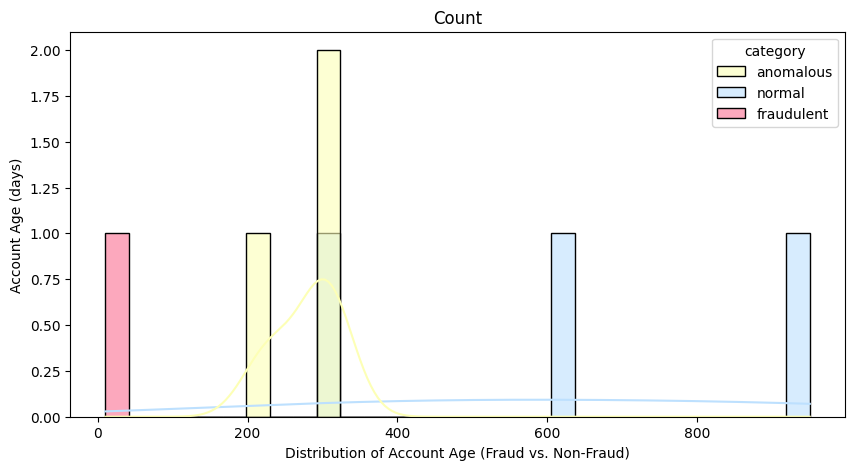

In [28]:
account_age_by_category(df)

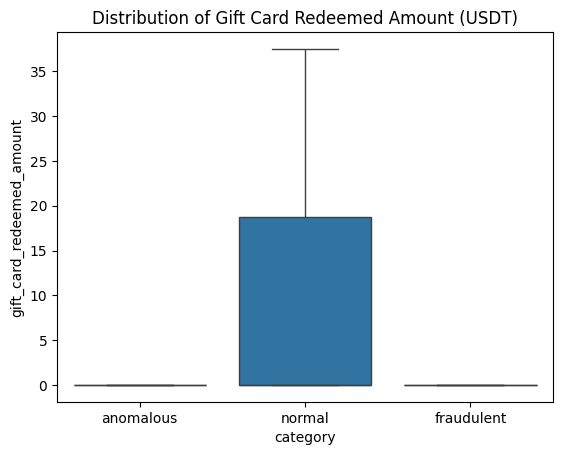

In [32]:
sns.boxplot(x = 'category', y = 'gift_card_redeemed_amount', data = df)
plt.title("Distribution of Gift Card Redeemed Amount (USDT)")
plt.show()

In [4]:
df.head()

,Unnamed: 0,location,num_of_unique_IPs_used,login_count,num_of_frequent_operations,c2c_place_order_count,c2c_release_order_count,gift_card_created_amount,gift_card_redeemed_amount,amount,wallet_balance,wallet_free_balance,wallet_locked_balance,deposit_status,transaction_time,prev_transaction_time,account_age_days
0,1,Rawalpindi,13,31,76,30,27,0.0,0.00,7449.43,45642.36,15529.46,12765.51,Completed,2024-06-12 23:14:34,2024-03-26 21:42:23,305
1,2,Islamabad,3,5,13,9,5,0.0,0.00,812.21,4704.45,2509.84,940.56,Completed,2024-02-28 14:27:13,2024-02-02 08:44:25,607
2,3,Karachi,3,5,17,7,5,0.0,0.00,1.00,500000.00,2.00,0.00,Completed,2024-04-07 19:37:57,2024-03-13 23:29:48,304
3,4,Faisalabad,72,38,13,4,5,4234.1,0.00,16675.35,26603.31,20424.28,16512.45,Pending,2024-05-22 22:55:07,2024-05-19 22:46:46,10
4,5,Rawalpindi,3,11,20,7,1,0.0,37.51,160.24,1715.62,2372.89,832.61,Completed,2024-12-12 19:35:17,2024-12-05 17:28:14,951


In [6]:
def cases_by_location(df):
    counts = df.groupby(['location', 'status']).size().reset_index(name='count')

    # Custom color map
    custom_colors = {
        "Fraudulent": "#ffc8dd", 
        "Normal": "#bde0fe", 
        "Anomalous": "#ffedf4"      
    }

    # Plot
    fig = px.bar(
        counts,
        x="location",
        y="count",
        width=1200,
        height=500,
        color="status",
        color_discrete_map=custom_colors,
        title="📍 Status Distribution by Location",
        labels={
            "location": "City",
            "count": "Number of Cases",
            "status": "Transaction Status"
        }
    )
    

    # Add custom layout with merged annotations
    fig.update_layout(
        title={
            "text": "📍<b>Status Distribution by Location</b><br>",
            "x": 0.5,
            "xanchor": "center"
        },
        title_font=dict(
            family=outfit_extra_bold.get_name(),
            size=40,
            color="black"
        ),
        legend_title_text="Transaction Status",
        margin=dict(t=100, b=100),
        annotations=[
            dict(
            text="This chart shows how many 'Normal', 'Fraudulent', and 'Anomalous' transactions occurred in each city.",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0.5,
            y=1.1,  # Position just below the main title
            xanchor='center',
            font=dict(size=16, color="black"),
            ),
        
            dict(
                text="ℹ️ Use this chart to understand which locations have more suspicious activity.",
                showarrow=False,
                xref="paper",
                yref="paper",
                x=0,
                y=-0.25,
                font=dict(size=12),
                align="left",
                bgcolor="#f8f9fa",
                opacity=0.8
            ),
            
        ]
    )

    fig.show()


In [7]:
cases_by_location(df)

In [8]:
df.columns


Index(['Unnamed: 0', 'location', 'num_of_unique_IPs_used', 'login_count',
       'num_of_frequent_operations', 'c2c_place_order_count',
       'c2c_release_order_count', 'gift_card_created_amount',
       'gift_card_redeemed_amount', 'amount', 'wallet_balance',
       'wallet_free_balance', 'wallet_locked_balance', 'deposit_status',
       'transaction_time', 'prev_transaction_time', 'account_age_days',
       'status'],
      dtype='object')

In [9]:
px.box(df, x="status", y="amount", color="status", title="💰 Transaction Amount Distribution by Status")


In [10]:
px.histogram(df, x="wallet_balance", color="status", barmode="overlay", title="🔒 Wallet Balance by Transaction Type")


In [11]:
df["freq_ops_group"] = pd.cut(df["num_of_frequent_operations"], bins=[0, 5, 10, 20, 50, 100], labels=["0–5", "6–10", "11–20", "21–50", "51+"])
px.bar(df.groupby(["freq_ops_group", "status"]).size().reset_index(name="count"),
       x="freq_ops_group", y="count", color="status", title="🔁 Frequent Ops vs Status", barmode="stack")


C:\Users\HP\AppData\Local\Temp\ipykernel_96668\1718423568.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [89]:

# Add a small constant to wallet_balance to avoid zero size
#df['wallet_balance'] = df['wallet_balance'].replace(0, 1)
fig = px.scatter(
    df, 
    x="amount", 
    y="wallet_balance", 
    color="status", 
    title="💸 Amount vs Wallet Balance",
    size="wallet_balance",  # Set size based on wallet_balance or another column
    
    size_max=50  # Increase the maximum size of the bubbles (adjust this value)
)

# Show the plot
fig.show()

In [86]:
df['wallet_balance']

0    500000.00
1         1.00
2         0.00
3     36460.07
4     10370.26
Name: wallet_balance, dtype: float64

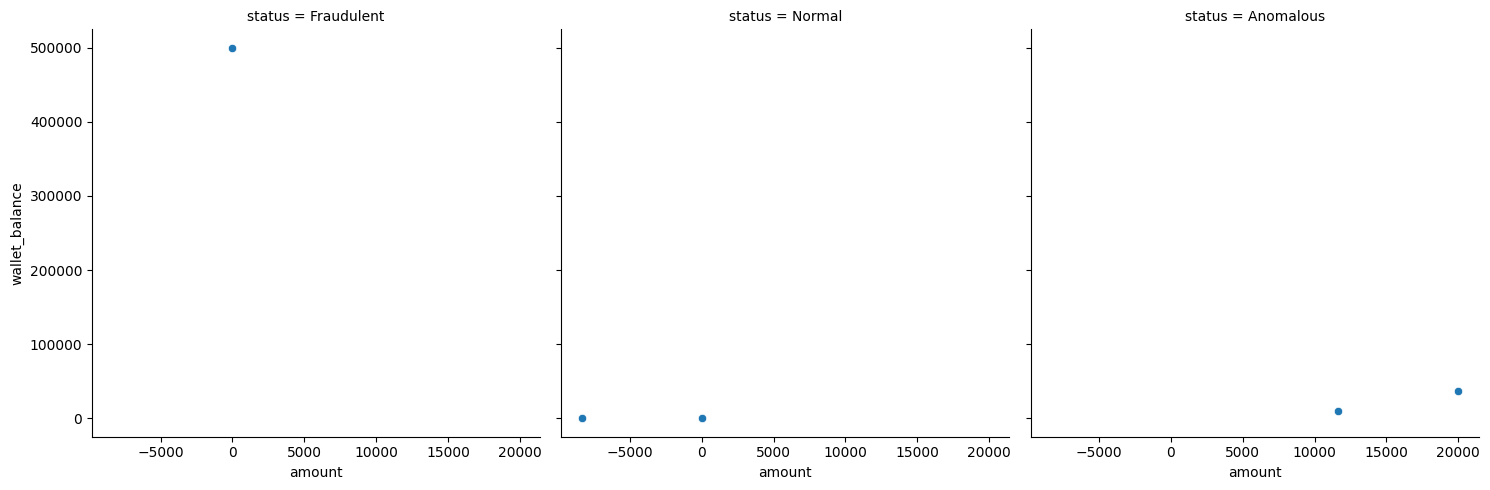

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facet grid by status for better comparison
g = sns.FacetGrid(df, col="status", height=5)
g.map(sns.scatterplot, "amount", "wallet_balance")
plt.show()


In [92]:
df['amount']

0        1.000000
1        1.000000
2    -8352.464734
3    19998.850000
4    11634.730000
Name: amount, dtype: float64

In [263]:
def deposit_status_pie_chart(data):
    fig = px.pie(
        data,
        names="deposit_status",
        title="🏦 Distribution of Deposit Status Across Transaction Types",
        hole=0.4,
        facet_col="status",  # Create separate pie charts for each transaction status
        color_discrete_sequence=["#bde0fe", "#fb6f92", "#fdffb6"],  # Custom color scheme
    )

    # Display both label and percentage inside slices
    fig.update_traces(
        textposition='inside',
        textinfo='percent+label',
        textfont=dict(size=14, color='black'),
        pull=[0.02]*len(df['deposit_status'].unique())  # Slightly pull slices for better visibility
    )
    fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].strip(), font=dict(size=18,color="#3b3b3b")))

    # Layout enhancements
    fig.update_layout(
        title={
            "text": "<b>Deposit Status Breakdown by Transaction Status</b>",
            "x": 0.01,
            "xanchor": "left"
        },
        title_font=dict(
            family=outfit_extra_bold.get_name(),
            size=32,
            color="#3b3b3b"
        ),
        legend_title_text="<b>Deposit Status</b>",
        margin=dict(t=100, b=80),
        height=600,
)
    fig.show()


In [264]:
deposit_status_pie_chart(df)

In [24]:
fig = px.sunburst(
    df,
    path=["status", "deposit_status"],
    title="🏦 Deposit Status Distribution by Transaction Type"
)
fig.show()


In [66]:
fig = px.histogram(df, x="account_age_days", color="status", barmode="overlay", title="📅 Account Age Distribution by Status", text_auto=True)
fig.update_layout(bargap=0.2)
fig.update_traces(opacity=0.75)
fig.show()


In [ ]:
def radar_chart_transaction_profiles(df):
    """
    This function generates a radar chart to compare the average behavioral profile of Normal, Anomalous, and 
    Fraudulent transactions across various features. The values are normalized using MinMaxScaler for a 
    fair comparison.

    Features used include:
    - Login activity
    - Number of unique IPs
    - Gift card behavior
    - Wallet balances
    - Account age
    - Order activity

    This visualization helps in identifying the relative behavior patterns of different transaction types.
    For example, fraudulent users may have higher login attempts, more unique IPs, or different wallet patterns.
    """

    # 1. Select relevant features
    features = [
        'num_of_unique_IPs_used',
        'login_count',
        'num_of_frequent_operations',
        'c2c_place_order_count',
        'c2c_release_order_count',
        'gift_card_created_amount',
        'gift_card_redeemed_amount',
        'amount',
        'wallet_balance',
        'wallet_free_balance',
        'wallet_locked_balance',
        'account_age_days'
    ]

    # 2. Compute mean values for each transaction status group
    grouped = df[df["status"].isin(["Normal", "Fraudulent", "Anomalous"])].groupby("status")[features].mean()

    # 3. Normalize the values using MinMaxScaler for consistent scale
    scaler = MinMaxScaler()
    normalized = pd.DataFrame(scaler.fit_transform(grouped), columns=features, index=grouped.index)

    # 4. Prepare data for radar chart (loop back to the first feature for full circle)
    categories = features + [features[0]]
    normal_values = normalized.loc["Normal"].tolist() + [normalized.loc["Normal"].tolist()[0]]
    anomalous_values = normalized.loc["Anomalous"].tolist() + [normalized.loc["Anomalous"].tolist()[0]]
    fraud_values = normalized.loc["Fraudulent"].tolist() + [normalized.loc["Fraudulent"].tolist()[0]]

    # 5. Create radar chart
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=normal_values,
        theta=categories,
        fill='toself',
        name='Normal',
        line_color='green'
    ))
    fig.add_trace(go.Scatterpolar(
        r=anomalous_values,
        theta=categories,
        fill='toself',
        name='Anomalous',
        line_color='orange'
    ))
    fig.add_trace(go.Scatterpolar(
        r=fraud_values,
        theta=categories,
        fill='toself',
        name='Fraudulent',
        line_color='red'
    ))

    fig.update_layout(
    title={
        "text": "<b>Comparison of User Behavior Across Transaction Types</b><br>",
        "x": 0.03,
        "y":0.95,
        "xanchor": "left"
    },
    title_font=dict(
        family=outfit_bold.get_name(),
        size=30,
        color="#222"
    ),
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1],  # Normalized range
            tickfont=dict(size=12)
        ),
        angularaxis=dict(
            tickfont=dict(size=12)
        )
    ),
    legend_title_text="<b>Transaction Status</b>",
    height=700,
    margin=dict(t=150, b=80),
    annotations=[
        dict(
            text="This radar chart compares average user behavior for different transaction types (Normal, Anomalous, Fraudulent). The features show key activity metrics like</sup><br>"
                "account age, wallet balance, login frequency, and gift card usage.",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=-0.03,
            y=1.22,  # Position just below the main title
            xanchor='left',
            font=dict(size=16, color="black"),
            ),
        dict(
            text="This chart shows the relative behavior of users based on various features (e.g., wallet balance, login count, gift card usage). Features are normalized for easy comparison.",
            xref="paper", yref="paper",
            x=0.5, y=-0.12,
            showarrow=False,
            font=dict(size=14, color="gray"),
            align="center"
        ),
    ]
)


    fig.show()


In [356]:
radar_chart_transaction_profiles(df)